In [1]:
import pandas as pd
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk
import pickle
from gensim import models
from gensim import similarities
import tensorflow_hub as hub
from tensorflow import linalg, math
import stop_words as sw
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt

# from math import softplus

In [10]:
df = pd.read_csv("clean_review.csv")

In [11]:
df.isna().sum()

text     0
score    0
dtype: int64

In [12]:
df = df.dropna() 

In [13]:
df.to_csv("clean_review.csv", encoding='utf-8', index=False)

In [14]:
df.head()

,text,score
0,bought vitality canned dog food product good q...,5
1,product arrived labeled jumbo salted peanut th...,1
2,confection century light pillowy citrus gelati...,4
3,looking secret ingredient robitussin believe i...,2
4,great taffy great price wide assortment yummy ...,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394955 entries, 0 to 394954
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    394955 non-null  object
 1   score   394955 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.0+ MB


Text(0, 0.5, 'Frequency')

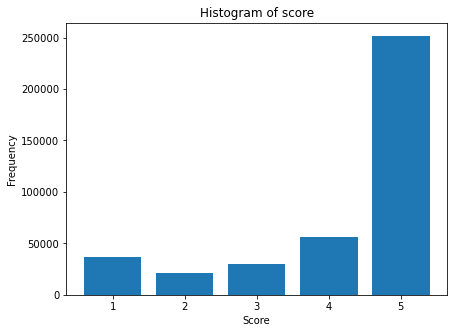

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x_ax,word_count = np.unique(df['score'],return_counts=True)
plt.bar([str(i) for i in x_ax],word_count)
plt.title("Histogram of score")
plt.xlabel("Score")
plt.ylabel("Frequency")

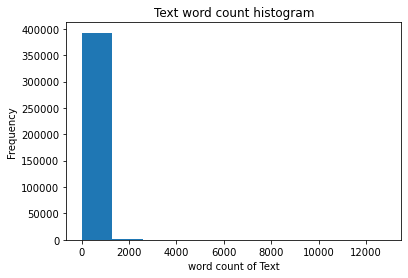

In [27]:
df_len = df['text'].apply(lambda x: len(x))

fig, ax = plt.subplots(figsize = (6,4))

plt.hist(df_len, density = False)
plt.title('Text word count histogram')
plt.xlabel('word count of Text')
plt.ylabel('Frequency')
plt.show()

df_len.describe().to_clipboard(excel=True)

<AxesSubplot:xlabel='score', ylabel='num_words_text'>

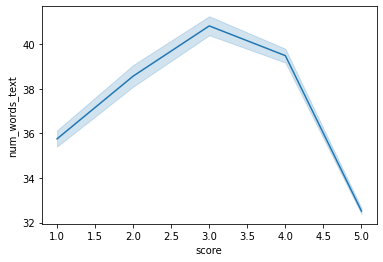

In [160]:
import seaborn as sns
plt.figure(figsize=(6,4))
df['num_words_text'] = df['text'].apply(lambda x:len(str(x).split())) 
sns.lineplot(data=df,x="score", y="num_words_text")

100%|███████████████████████████████| 394954/394954 [00:03<00:00, 110437.78it/s]


Text(0, 0.5, 'Frequency')

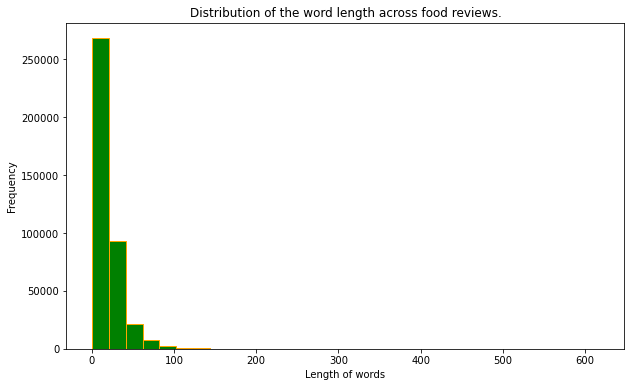

In [28]:
from tqdm import tqdm

dist = []
for i in tqdm(tokens):
    length = len(i)
    dist.append(length)

plt.figure(figsize=(10,6))
plt.hist(dist, color = 'green', edgecolor = 'orange', bins =30)
plt.title('Distribution of the word length across food reviews.')
plt.xlabel('Length of words')
plt.ylabel('Frequency')

In [6]:
stop_words = ["purchased","four","useful","already","approximately","mostly","into","usually","usefully","try","got","seems","predominantly","off","edu","whoever","anyway","placed","brief","many","cause","immediately","myself","begin","m","shall","even","mean","hi","adj","readily","came","is","wherein","d","through","least","regardless","being","down","available","had","strongly","keep","whose","from","thou","significant","it","auth","obtain","first","latterly","wants","world","follows","else","somewhat","vol","vs","particular","home","means","more","some","c","mg","him","uses","how","i","they","went","me","believe","wed","gets","every","mainly","hes","hardly","specify","by","sorry","must","hereafter","namely","tell","an","id","added","the","beginnings","certain","usefulness","need","taking","y","found","til","vols","regards","did","others","shes","than","whomever","to","potentially","asking","kg","hed","across","ending","never","neither","whim","towards","x","if","thank","herein","welcome","should","six","but","ord","eighty","ourselves","therefore","inward","says","following","zero","theyd","thereupon","eight","almost","of","necessarily","under","furthermore","re","few","where","yes","contain","aren","l","ts","specifically","however","without","regarding","promptly","different","saying","moreover","act","youd","otherwise","itd","tried","been","no","accordingly","take","ex","seemed","somewhere","unlike","there","couldnt","specifying","whereupon","nobody","other","for","o","formerly","proud","value","nd","them","yourself","shows","two","whereby","ref","throug","five","near","nay","hers","relatively","above","et","whats","thanks","youre","ask","thats","doing","omitted","biol","needs","hereby","somehow","wasnt","normally","far","new","have","oh","somebody","at","tip","ca","which","non","noone","related","beyond","anyone","part","resulted","although","lets","look","research","thru","think","j","whod","along","together","alone","saw","affecting","everyone","therere","briefly","sometime","like","only","seen","truly","suggest","probably","anything","whereafter","against","he","ah","whereas","likely","so","u","q","about","various","actually","nowhere","until","mrs","abst","much","mug","refs","past","slightly","often","looking","throughout","made","keeps","enough","everything","thereto","thanx","z","getting","p","way","several","too","name","s","ie","onto","yourselves","becomes","shed","unto","r","see","be","awfully","yet","possibly","always","among","indeed","done","causes","ought","whatever","up","afterwards","sent","affected","his","why","immediate","plus","mr","quite","h","k","then","this","thus","and","recent","ups","v","having","particularly","largely","gotten","last","containing","happens","itself","nor","un","effect","unless","wheres","www","ml","want","page","give","thoughh","forth","herself","over","merely","once","you","still","poorly","invention","himself","we","hid","not","does","qv","looks","given","followed","sufficiently","lately","willing","thence","really","rather","provides","resulting","toward","thered","something","am","beforehand","ff","noted","anyhow","seeming","fifth","before","any","nearly","away","except","whenever","back","most","our","okay","quickly","importance","previously","primarily","make","none","anymore","own","significantly","certainly","anybody","whom","ltd","while","begins","sup","end","wouldnt","knows","right","on","f","million","unlikely","each","announce","therein","upon","next","especially","are","widely","line","stop","fix","could","as","hundred","just","became","ninety","similar","index","gave","thereby","unfortunately","liked","showns","run","b","com","e","become","necessary","below","thereafter","sure","put","owing","im","obtained","results","according","seem","their","arise","comes","pp","eg","lest","km","co","via","showed","whether","your","important","overall","shown","ones","beginning","same","those","nine","viz","obviously","with","que","na","heres","recently","was","possible","or","one","sec","contains","her","less","elsewhere","she","used","during","do","ever","taken","within","latter","ok","seeing","after","g","substantially","aside","themselves","us","accordance","hereupon","sometimes","come","nothing","theres","arent","anywhere","though","nevertheless","its","behind","were","self","hence","old","sub","between","theyre","specified","whos","known","maybe","words","becoming","soon","w","tries","werent","all","theirs","besides","instead","out","successfully","both","who","gives","around","per","beside","also","wish","amongst","we've","might","meanwhile","when","date","little","let","selves","pages","apparently","use","using","later","whence","ed","nonetheless","affects","respectively","ran","in","go","nos","took","giving","here","say","another","wont","know","thereof","trying","downwards","th","whither","former","seven","show","yours","tends","anyways","whole","get","information","perhaps","section","hither","my","said","due","either","miss","someone","howbeit","twice","everybody","n","present","ours","everywhere","further","cannot","goes","t","etc","very","thousand","makes","what","now","inc","rd","since","these","somethan","would","such","meantime","gone","outside","please","similarly","that","has","because","again","kept","able","may","can","wherever"]
stop_words_topics = ["purchase", "good","market","product","favorite","tastes","flavor","tasty","quality","excellent","tasting","wonderful","surprise","shipped","omg","easy","yum","taste","shipment","yummy","delicious","better","will","buy","service","best","pretty","perfect","special","decent","better","shipping","great","love","pleasant","stuff","nice"]
stop_words_found_more = ["msg", "bought", 'a', "recommendation","packet","pack","thing","sell","eat","pay","receive","find","item","list","open","review","arrive","purchase","payment","subscribe","box","price","amazon","top","recommend","money","store","food","well","free","cost","order","feel","help","package","highly"]

stop_words.extend(stop_words_topics)
stop_words.extend(stop_words_found_more)
sw.add_stopwords(stop_words)

In [7]:
def rem_stop_extra(text):
    words_to_cons = []
    words_arr = text.split()
    for word in words_arr:
        if word not in stop_words:
            words_to_cons.append(word)
    words_final = " ".join(words_to_cons)
    return words_final

In [17]:
df["text_clean"] = df["text"].apply(rem_stop_extra)

In [18]:
df.head()

,text,score,text_clean
0,bought vitality canned dog food product good q...,5,vitality canned dog stew processed meat smell ...
1,product arrived labeled jumbo salted peanut th...,1,arrived labeled jumbo salted peanut peanut sma...
2,confection century light pillowy citrus gelati...,4,confection century light pillowy citrus gelati...
3,looking secret ingredient robitussin believe i...,2,secret ingredient robitussin addition root bee...
4,great taffy great price wide assortment yummy ...,5,taffy wide assortment taffy delivery quick taf...


In [19]:
df.to_csv("clean_review.csv", encoding='utf-8', index=False)

In [97]:
tokens = []
stop_words = sw.get_stopwords()

for m in df["text"].tolist():
    sent_token = []
    for n in m.split():
        if n not in sent_token and n not in stop_words:
            sent_token.append(n)
    tokens.append(sent_token)

In [130]:
tokens

[['vitality',
  'canned',
  'dog',
  'stew',
  'processed',
  'meat',
  'smell',
  'labrador',
  'finicky',
  'appreciates'],
 ['arrived',
  'labeled',
  'jumbo',
  'salted',
  'peanut',
  'small',
  'sized',
  'unsalted',
  'error',
  'vendor',
  'intended',
  'represent'],
 ['confection',
  'century',
  'light',
  'pillowy',
  'citrus',
  'gelatin',
  'nut',
  'case',
  'filbert',
  'cut',
  'tiny',
  'square',
  'liberally',
  'coated',
  'powdered',
  'sugar',
  'mouthful',
  'heaven',
  'chewy',
  'flavorful',
  'treat',
  'familiar',
  'story',
  'lewis',
  'lion',
  'witch',
  'wardrobe',
  'seduces',
  'edmund',
  'selling',
  'brother',
  'sister'],
 ['secret',
  'ingredient',
  'robitussin',
  'addition',
  'root',
  'beer',
  'extract',
  'ordered',
  'cherry',
  'soda',
  'medicinal'],
 ['taffy', 'wide', 'assortment', 'delivery', 'quick', 'lover', 'deal'],
 ['wild',
  'hair',
  'taffy',
  'ordered',
  'pound',
  'bag',
  'enjoyable',
  'watermelon',
  'root',
  'beer',
  'm

In [134]:
token_index_to_del = 0
for i, tok in enumerate(tokens):
    if len(tok) == 0:
        token_index_to_del = i
        print(i, tok)
        break

73 []


In [135]:
del tokens[token_index_to_del]

In [137]:
dictionary = corpora.Dictionary(tokens)
print(dictionary)

Dictionary<111753 unique tokens: ['appreciates', 'canned', 'dog', 'finicky', 'labrador']...>


In [138]:
pickle.dump(dictionary, open("dic_tokens", 'wb'))

In [136]:
pickle.dump(tokens, open("tokens", 'wb'))

In [22]:
# dictionary = pickle.load(open("dic_tokens", "rb"))
tokens = pickle.load(open('tokens', 'rb'))

In [23]:
dictionary = corpora.Dictionary(tokens)

In [104]:
dictionary.token2id

{'appreciates': 0,
 'canned': 1,
 'dog': 2,
 'finicky': 3,
 'labrador': 4,
 'meat': 5,
 'processed': 6,
 'smell': 7,
 'stew': 8,
 'vitality': 9,
 'arrived': 10,
 'error': 11,
 'intended': 12,
 'jumbo': 13,
 'labeled': 14,
 'peanut': 15,
 'represent': 16,
 'salted': 17,
 'sized': 18,
 'small': 19,
 'unsalted': 20,
 'vendor': 21,
 'brother': 22,
 'case': 23,
 'century': 24,
 'chewy': 25,
 'citrus': 26,
 'coated': 27,
 'confection': 28,
 'cut': 29,
 'edmund': 30,
 'familiar': 31,
 'filbert': 32,
 'flavorful': 33,
 'gelatin': 34,
 'heaven': 35,
 'lewis': 36,
 'liberally': 37,
 'light': 38,
 'lion': 39,
 'mouthful': 40,
 'nut': 41,
 'pillowy': 42,
 'powdered': 43,
 'seduces': 44,
 'selling': 45,
 'sister': 46,
 'square': 47,
 'story': 48,
 'sugar': 49,
 'tiny': 50,
 'treat': 51,
 'wardrobe': 52,
 'witch': 53,
 'addition': 54,
 'beer': 55,
 'cherry': 56,
 'extract': 57,
 'ingredient': 58,
 'medicinal': 59,
 'ordered': 60,
 'robitussin': 61,
 'root': 62,
 'secret': 63,
 'soda': 64,
 'assortme

In [24]:
bow_corpus = [dictionary.doc2bow(text) for text in tokens]

In [140]:
pickle.dump(bow_corpus, open("bow_corpus", 'wb'))

In [107]:
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1)],
 [(10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1)],
 [(51, 1),
  (55, 1),
  (60, 1),
  (62, 1),
  (70, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87

In [25]:
tfidf_model = models.TfidfModel(bow_corpus, normalize=True)

In [142]:
id_words = [[(dictionary[id], count) for id, count in line] for line in bow_corpus]

In [143]:
id_words

[[('appreciates', 1),
  ('canned', 1),
  ('dog', 1),
  ('finicky', 1),
  ('labrador', 1),
  ('meat', 1),
  ('processed', 1),
  ('smell', 1),
  ('stew', 1),
  ('vitality', 1)],
 [('arrived', 1),
  ('error', 1),
  ('intended', 1),
  ('jumbo', 1),
  ('labeled', 1),
  ('peanut', 1),
  ('represent', 1),
  ('salted', 1),
  ('sized', 1),
  ('small', 1),
  ('unsalted', 1),
  ('vendor', 1)],
 [('brother', 1),
  ('case', 1),
  ('century', 1),
  ('chewy', 1),
  ('citrus', 1),
  ('coated', 1),
  ('confection', 1),
  ('cut', 1),
  ('edmund', 1),
  ('familiar', 1),
  ('filbert', 1),
  ('flavorful', 1),
  ('gelatin', 1),
  ('heaven', 1),
  ('lewis', 1),
  ('liberally', 1),
  ('light', 1),
  ('lion', 1),
  ('mouthful', 1),
  ('nut', 1),
  ('pillowy', 1),
  ('powdered', 1),
  ('seduces', 1),
  ('selling', 1),
  ('sister', 1),
  ('square', 1),
  ('story', 1),
  ('sugar', 1),
  ('tiny', 1),
  ('treat', 1),
  ('wardrobe', 1),
  ('witch', 1)],
 [('addition', 1),
  ('beer', 1),
  ('cherry', 1),
  ('extract'

In [144]:
tfidf_model

In [26]:
pickle.dump(tfidf_model, open("tfidf_model", 'wb'))

In [146]:
word_vec_model = models.Word2Vec(bow_corpus)

KeyboardInterrupt: 

In [ ]:
word_vec_model

In [ ]:
pickle.dump(word_vec_model, open("word_vec_model", 'wb'))

In [29]:
def get_top_n_words(n_top_words, vectorized_headlines, text_data):
 
#     vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [ ]:
words, word_values = get_top_n_words(n_top_words=10,
                                     vectorized_headlines=bow_corpus, 
                                     text_data=df['text'].astype('U'))

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in food review dataset without stop words');
ax.set_xlabel('Words');
ax.set_ylabel('Number of occurences');
plt.show()

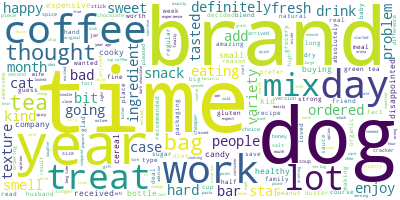

In [167]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', stopwords=stop_words)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()